# Consider the following function

***Note***: **Ploting markers are optional for this assignment**

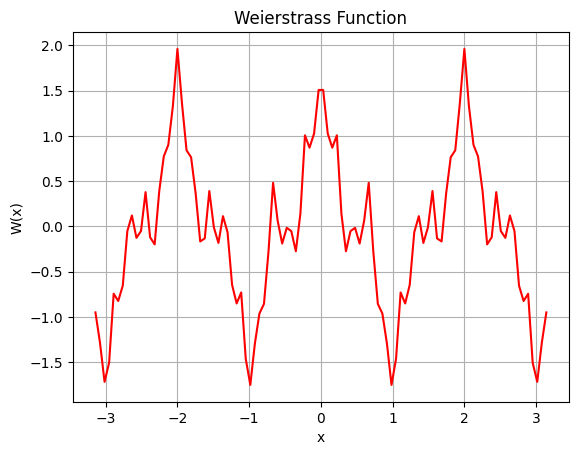

In [1]:
import numpy as np
import numpy.linalg as npl
import scipy.sparse as sps
import matplotlib.pyplot as plt

# Weierstrass function
def W(x, a=0.5, b=3, terms=100):
    return sum(a**n * np.cos(b**n * np.pi * x) for n in range(terms))

# Approximate derivative of Weierstrass function
def dW(W, x, h=1e-5):
    return (W(x + h) - W(x - h)) / (2 * h)


# Generate x values
num_points = 100
x = np.linspace(-np.pi, np.pi, num_points)

# Compute the Weierstrass function for all x
W_values = W(x)

# Plotting
plt.plot(x, W_values, color='red')
plt.title('Weierstrass Function')
plt.xlabel('x')
plt.ylabel('W(x)')
plt.grid()
plt.show()


- You are provided with data for 𝑥 and 𝑊 containing a predefined Monster function. Your task is to construct 𝑝(𝑥) for 12 points (for lagrange and newton method) for spline see following table, and then you need to test how closely 𝑝(𝑥) approximates the values of the mentioned function. You must also calculate the RMSE and plot the results step by step as demonstrated in this notebook. Also fill the values from your experment in following table.

In [14]:
num_points = 100  # Number of points for evaluation
z = np.linspace(-np.pi, np.pi, num_points)  # Test points for interpolation

# Define 12 data points for interpolation (Lagrange nodes)
x_points = np.linspace(-np.pi, np.pi, 12)
y_points = W(x_points)  # Calculate the Weierstrass values at these points

# Calculate the actual Weierstrass function at test points
W_actual = W(z)

# Comparison of Interpolation Techniques

| Interpolation Method              | RMSE               | Comments/Limitations                                                                                                     |
|-----------------------------------|--------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Lagrange**                      | 0.7708450603721554 | - **High Complexity**: Inefficient for large data sets due to polynomial growth.<br> - **Runge's Phenomenon**: Susceptible to oscillations, especially with high-degree polynomials. |
| **Newton's Divided Difference**   | 0.7708450603721784 | - **Efficient Updates**: Allows adding new data points without recalculating the entire polynomial.<br> - **Complexity**: Still less efficient for large data sets compared to piecewise methods like splines. |
| **Cubic Spline (n = 12)**         | 1.9131110044542774 | - **Boundary Conditions**: Sensitive to boundary derivatives, which affects accuracy at endpoints.<br> - **Smoothness**: Provides a smooth approximation but can have high error with fewer points. |
| **Cubic Spline (n = 24)**         | 0.7583303398161634 | - **Improved Accuracy**: Increasing the number of points improves accuracy but adds computation time.<br> - **Complexity**: More segments increase computational complexity. |
| **Cubic Spline (n = 48)**         | 0.3299703000015179 | - **High Accuracy**: Excellent approximation with sufficient data points.<br> - **Computational Cost**: Requires more resources and time with high data density. |



In [3]:
# Complete the following function  
def RMSE(y_actual, y_predicted):
    MSE = np.mean((np.array(y_actual) - np.array(y_predicted)) ** 2)
    return math.sqrt(MSE)
    
    

## Lagrange: Compute $L_i(x)$ here

In [4]:
# TODO: implement lagrange basis for polynomial interpolation
# this function should only compute the basis and return them in right order


def lagrange_basis(z, x):
# Compute the Lagrange basis l_i(z)
# given the nodes x_i stored in vector x
    n = len(x)
    m = len(z)
    basis = np.ones((n, m))
    for i in range(n):
        for j in range(n):
            if i != j:
                basis[i,:] *= (z-x[j])/(x[i]-x[j])
    return basis




## Lagrange: Calculate $p(x)$ through $L_i(x)$

In [5]:
# TODO: this functions performs evaluation of polynomial using coefficients computed from direct method
# z is the list of input numbers
# x and y are given 12 data points 

def lagrange_interpolant(z, x, y):
#Compute the interpolant using Lagrange polynomials
    n = len(x)
    m = len(z)
    P = np.zeros(m)
    basis = lagrange_basis(z, x)
    for i in range(n):
        P += basis[i,:] * y[i]
    return P

## Lagrange: Testing

RMSE for Lagrange interpolant: 0.7708450603721554


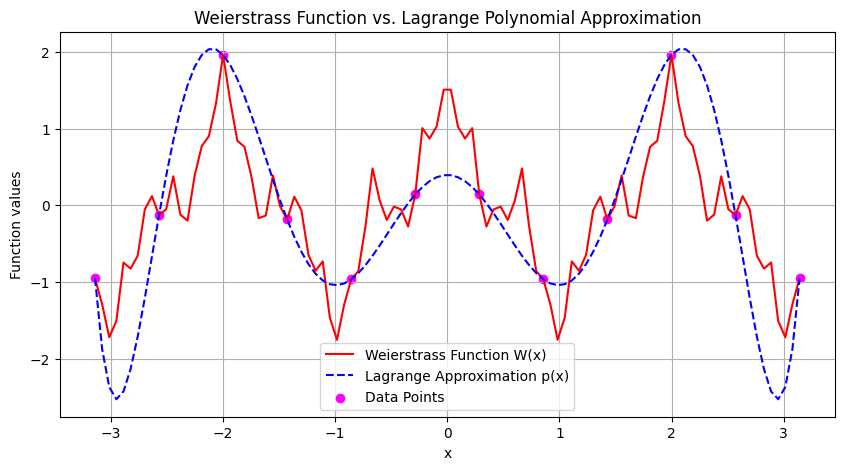

In [6]:
import math
# Calculate the Lagrange interpolant
P_lagrange = lagrange_interpolant(z, x_points, y_points)


# Calculate RMSE between interpolated and actual values
rmse_lagrange = RMSE(W_actual, P_lagrange)
print(f"RMSE for Lagrange interpolant: {rmse_lagrange}")

# Plotting Weierstrass function and Lagrange approximation
plt.figure(figsize=(10, 5))
plt.plot(z, W_actual, label="Weierstrass Function W(x)", color='red')
plt.plot(z, P_lagrange, label="Lagrange Approximation p(x)", linestyle='--', color='blue')
plt.scatter(x_points, y_points, color='magenta', marker='o', label="Data Points")  
plt.title("Weierstrass Function vs. Lagrange Polynomial Approximation")
plt.xlabel("x")
plt.ylabel("Function values")
plt.legend()
plt.grid()
plt.show()

In [7]:
# Complete the following two functions for newton method

def poly_coeffs(x, y):
    n = len(x)
    a = y.copy()
    for k in range(1,n):
        a[k:n] = (a[k:n] - a[k-1])/(x[k:n] - x[k-1])
    return a

#========================================================================

def poly_evaluation(a,x,z):
    #Evaluation of the polynomial with coefficients a at the points z
    N = len(x) - 1 #Degree of polynomial
    p = a[N]
    for k in range(1,N+1):
        p = a[N-k] + (z - x[N-k])*p
    return p


RMSE for Newton interpolant: 0.7708450603721784


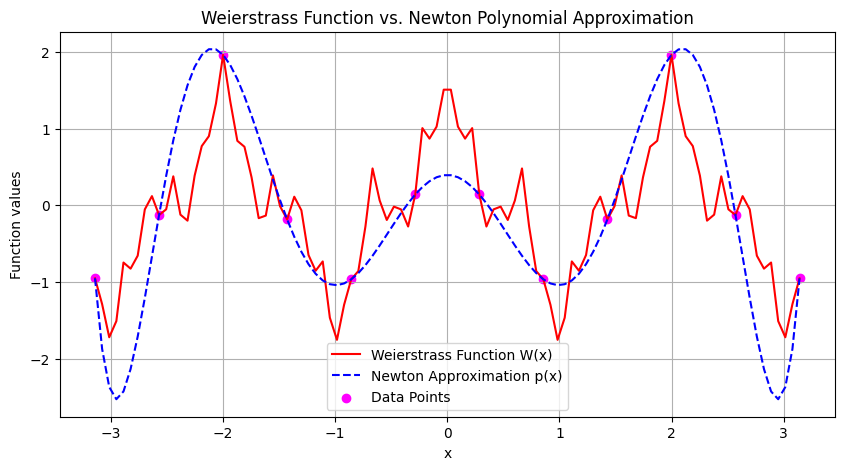

In [8]:
# plot your results as according to following example, you must provide RMSE Value as well    
# Calculate Newton coefficients
coeffs = poly_coeffs(x_points, y_points)

# Evaluate the Newton polynomial at test points
P_newton = np.array([poly_evaluation(coeffs, x_points, zi) for zi in z])
# Calculate RMSE between interpolated and actual values
rmse_newton = RMSE(W_actual, P_newton)
print(f"RMSE for Newton interpolant: {rmse_newton}")

# Plotting Weierstrass function, Newton interpolation, and data points
plt.figure(figsize=(10, 5))
plt.plot(z, W_actual, label="Weierstrass Function W(x)", color='red')
plt.plot(z, P_newton, label="Newton Approximation p(x)", linestyle='--', color='blue')
plt.scatter(x_points, y_points, color='magenta', marker='o', label="Data Points")  # Plot data points
plt.title("Weierstrass Function vs. Newton Polynomial Approximation")
plt.xlabel("x")
plt.ylabel("Function values")
plt.legend()
plt.grid()
plt.show()

In [9]:
def MyCubicSpline(x, y, dy0, dyN):
    # Returns the moments of f given the data x, y
    # dy0 is the derivative at the left boundary
    # dyN is the derivative at the right boundary
    n = len(x)
    c = np.zeros(n); v = np.zeros(n); u = np.zeros(n-1)
    l = np.zeros(n-1); b = np.zeros(n-1); h = np.zeros(n-1)
    for i in range(n-1):
        h[i] = x[i+1] - x[i]
        b[i] = (y[i+1]-y[i])/h[i] 
    u[0] = 1.0
    v[0] = 6.0*(b[0]-dy0)/h[0]
    c[0] = 2.0
    for i in range(1,n-1):
        c[i] = 2.0
        u[i] = h[i]/(h[i-1] + h[i])
        l[i-1] = h[i-1]/(h[i-1] + h[i])
        v[i] = 6.0*(b[i]-b[i-1])/(h[i-1] + h[i])
    l[n-2] = 1.0
    c[n-1] = 2.0
    v[n-1] = 6.0*(dyN-b[n-2])/h[n-2]
    diagonals = [c, l, u]
    A = sps.diags(diagonals, [0, -1, 1]).todense()
    z = npl.solve(A,v)
    return z

In [10]:
def EvalCubicSpline(x, y, z, xx):
    # Returns the cubic spline evaluated at xx
    # z = the moments of the cubic spline
    # xx = the vector with values of x on which we want the cubic spline
    n = len(x)
    m = len(xx)
    yy = np.zeros(m)
    for j in range(m):
        xvalue = xx[j]
        # First detect the index i
        for i in range(n-2, -1, -1):
            if (xvalue - x[i] >= 0.0):
                break
    # Implement formula (\ref{eq:clmbcbspl})
        h = x[i+1] - x[i]
        B = -h*z[i+1]/6.0-h*z[i]/3.0+(y[i+1]-y[i])/h
        tmp =z[i]/2.0+(xvalue-x[i])*(z[i+1]-z[i])/6.0/h        
        tmp = B+(xvalue-x[i])*tmp     
        yy[j] = y[i] + (xvalue - x[i])*tmp   
    return yy

In [36]:
n=12
xx = np.linspace(-np.pi, np.pi, n)
y = W(xx)
z = dW(W,xx)
dy0 = z[0]  # Left boundary derivative
dyN = z[-1]  # Right boundary derivative

RMSE for Cubic Spline: 1.9131110044542774


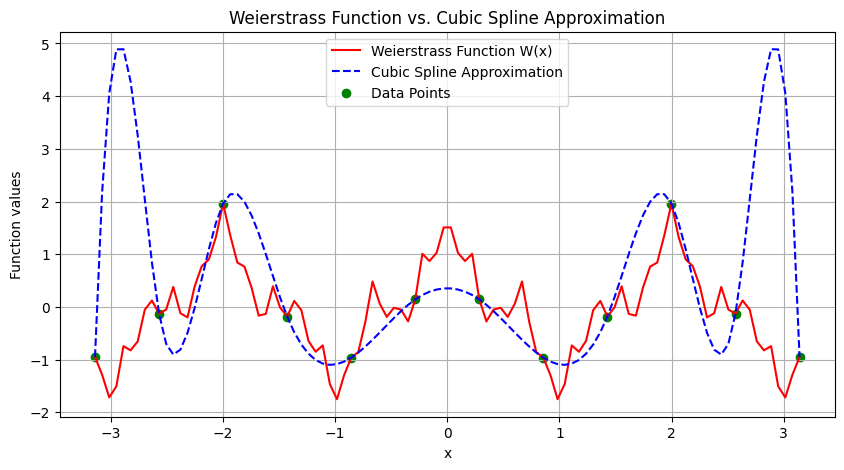

In [37]:
# Calculate spline moments
z = MyCubicSpline(xx, y, dy0, dyN)

spline_values = EvalCubicSpline(xx, y, z, x)

# Calculate RMSE between spline and actual values
rmse_spline = RMSE(W_values, spline_values)
print(f"RMSE for Cubic Spline: {rmse_spline}")

# Plotting Weierstrass function, cubic spline, and data points
plt.figure(figsize=(10, 5))
plt.plot(x, W_values, label="Weierstrass Function W(x)", color='red')
plt.plot(x, spline_values, label="Cubic Spline Approximation", linestyle='--', color='blue')
plt.scatter(xx, y, color='green', marker='o', label="Data Points")
plt.title("Weierstrass Function vs. Cubic Spline Approximation")
plt.xlabel("x")
plt.ylabel("Function values")
plt.legend()
plt.grid()
plt.show()

RMSE for Cubic Spline (n=24): 0.7583303398161634


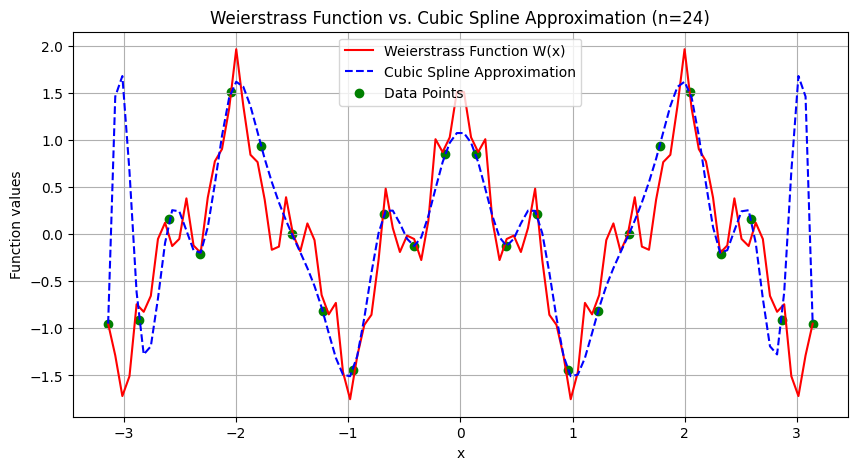

In [35]:

# plot your results as according to following example, you must provide RMSE Value as well    

n=24
xx = np.linspace(-np.pi, np.pi, n)
y = W(xx)
z = dW(W,xx)
dy0 = z[0]  # Left boundary derivative
dyN = z[-1]  # Right boundary derivative

# Calculate spline moments
z = MyCubicSpline(xx, y, dy0, dyN)

spline_values = EvalCubicSpline(xx, y, z, x)

# Calculate RMSE between spline and actual values
rmse_spline = RMSE(W_values, spline_values)
print(f"RMSE for Cubic Spline (n=24): {rmse_spline}")

# Plotting Weierstrass function, cubic spline, and data points
plt.figure(figsize=(10, 5))
plt.plot(x, W_values, label="Weierstrass Function W(x)", color='red')
plt.plot(x, spline_values, label="Cubic Spline Approximation", linestyle='--', color='blue')
plt.scatter(xx, y, color='green', marker='o', label="Data Points")
plt.title("Weierstrass Function vs. Cubic Spline Approximation (n=24)")
plt.xlabel("x")
plt.ylabel("Function values")
plt.legend()
plt.grid()
plt.show()


RMSE for Cubic Spline (n=48): 0.3299703000015179


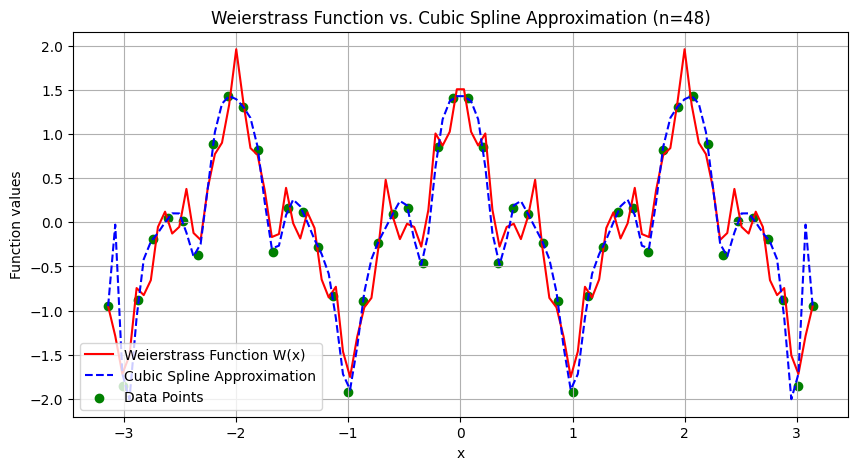

In [30]:
# plot your results as according to following example, you must provide RMSE Value as well    



# plot your results as according to following example, you must provide RMSE Value as well    

n = 48
xx = np.linspace(-np.pi, np.pi, n)
y = W(xx)
z = dW(W,xx)
dy0 = z[0]  # Left boundary derivative
dyN = z[-1]  # Right boundary derivative

# Calculate spline moments
z = MyCubicSpline(xx, y, dy0, dyN)

spline_values = EvalCubicSpline(xx, y, z, x)

# Calculate RMSE between spline and actual values
rmse_spline = RMSE(W_values, spline_values)
print(f"RMSE for Cubic Spline (n=48): {rmse_spline}")

# Plotting Weierstrass function, cubic spline, and data points
plt.figure(figsize=(10, 5))
plt.plot(x, W_values, label="Weierstrass Function W(x)", color='red')
plt.plot(x, spline_values, label="Cubic Spline Approximation", linestyle='--', color='blue')
plt.scatter(xx, y, color='green', marker='o', label="Data Points")
plt.title("Weierstrass Function vs. Cubic Spline Approximation (n=48)")
plt.xlabel("x")
plt.ylabel("Function values")
plt.legend()
plt.grid()
plt.show()




